# TP 2 ABM

## Amaury Burtin


Importing libraries 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
import powerlaw as pl
import yfinance as yf


# 1. Optimal learning

we have the following equation : 

$r_{t+1} = (\alpha - \hat{\alpha}_t) r_t + \epsilon_{t+1} $

$ \hat{\alpha}_t = \alpha + \frac{\varepsilon_t}{r_{t-1}} $

so we have : 

$r_{t+1} = - \frac{r_t}{r_{t-1}}\varepsilon_t + \varepsilon_{t+1}$

so $r_t$ is independent of $\alpha$


## Question 1

In [2]:
# Initialisation
NIT = 10000
std = 1
average = 0

E = np.random.normal(average,std,NIT)
R = [] #return

R.append(E[0])
R.append(E[1])

#recurrence formula

for i in range(1,NIT-1):
    R.append(-E[i]*R[i]/R[i-1]+E[i+1])


## Question 2 

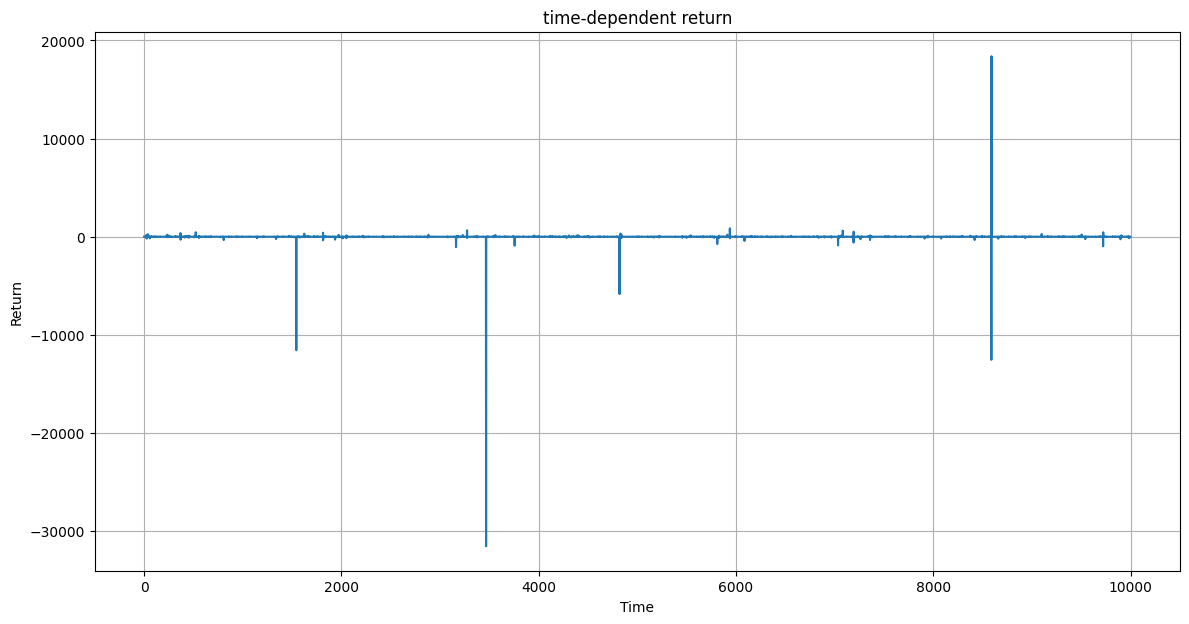

In [3]:
#Plotting the return 

plt.figure(figsize=(14, 7))
plt.plot(R)
plt.xlabel("Time")
plt.ylabel("Return")
plt.title("time-dependent return")
plt.grid(True)
plt.show()

At first glance, this doesn't appear to be a Gaussian process, as the return takes on very large values, whereas we're only generating 10,000 values. Some peaks can reach more than $1000$, but for a Gaussian process with standard deviation 1, $99.7$% of the values lie in the interval $\left[3, -3\right]$ . It is therefore impossible for a Gaussian process to reach such large values so often. 

# 2. Optimal learning

In [4]:
## Question 1

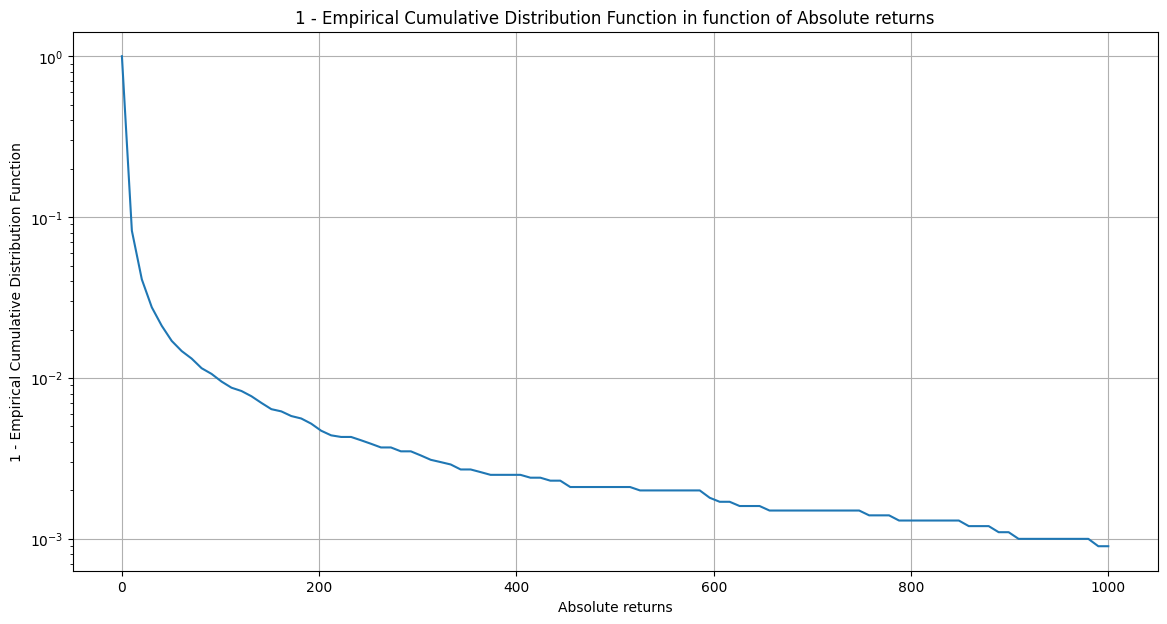

In [5]:
ABS_return = np.abs(R) #absolute returns
Comp_ECDF=[]
values = np.linspace(0,1000,100)

for r in values:
    Comp_ECDF.append(1-ECDF(ABS_return)(r))

plt.figure(figsize=(14, 7))
plt.plot(values,Comp_ECDF)
plt.yscale("log")
plt.ylabel("1 - Empirical Cumulative Distribution Function")
plt.xlabel("Absolute returns")
plt.title("1 - Empirical Cumulative Distribution Function in function of Absolute returns")
plt.grid(True)
plt.show()

## Question 2

Assymptotically, the decay is linear, which is characteristic of a heavy tail distribution.

## Question 3


In [6]:
Fit = pl.Fit(ABS_return, verbose=False) 

print("exponent : ", Fit.alpha) #with the powerlaw librairie we have directly alpha
print("effective start : ", Fit.xmin)

exponent :  1.880705634470758
effective start :  1.3610038467004923


the exponent seems close to 2

# 3. Optimal learning

## Question 1

As we showed at the beginning of section 1, $r_t$ does not depend on $\alpha$. So both plots depend only on $\sigma$

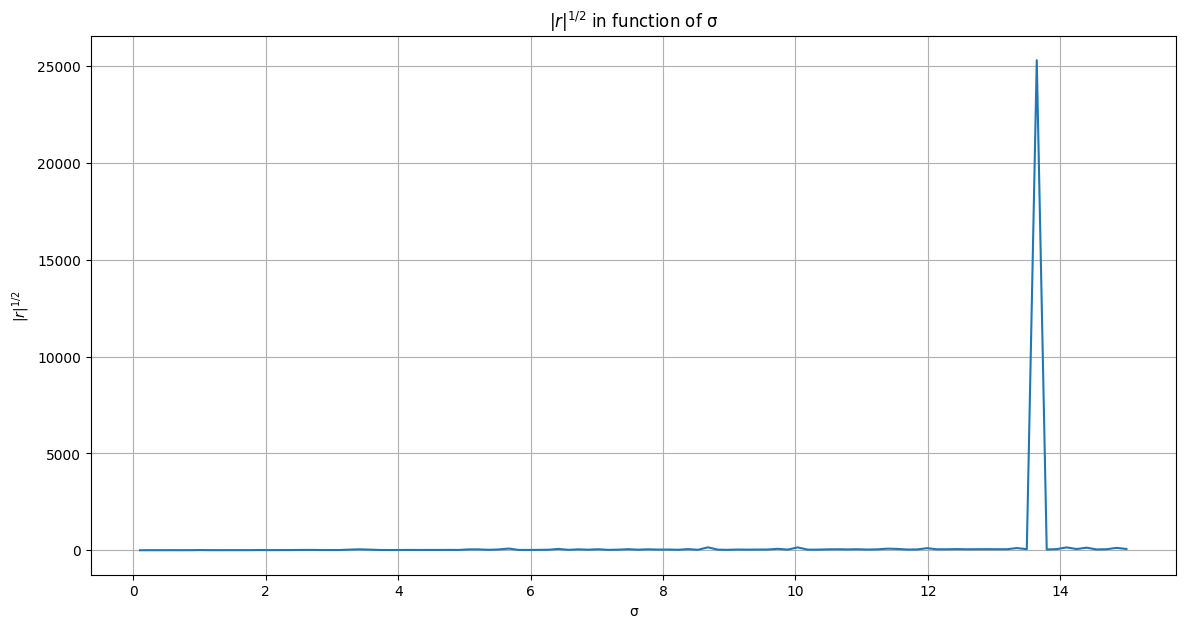

In [7]:
nb_sigma=100
average=0
sigma =np.linspace(0.1,15,nb_sigma)

R_Emp_average=[]

for j in sigma :
    E = np.random.normal(average,j,NIT)
    R = np.zeros(NIT)
    R[0]=E[0]
    R[1]=E[1]
    for i in range(1,NIT-1):
        R[i+1]=(-E[i]*R[i]/R[i-1]+E[i+1])
    R_Emp_average.append(np.mean(np.abs(R)**1/2))
    
plt.figure(figsize=(14, 7))
plt.plot(sigma, R_Emp_average)
plt.xlabel(chr(963))
plt.ylabel("$|r|^{1/2}$")
plt.title("$|r|^{1/2}$ in function of " + chr(963))
plt.grid(True)
plt.show()


it looks like a straight line, but peaks appear and interfere with the reading. We'll repeat the experiment several times to make them disappear, taking the median of the experiments performed.

## Question 1 bis

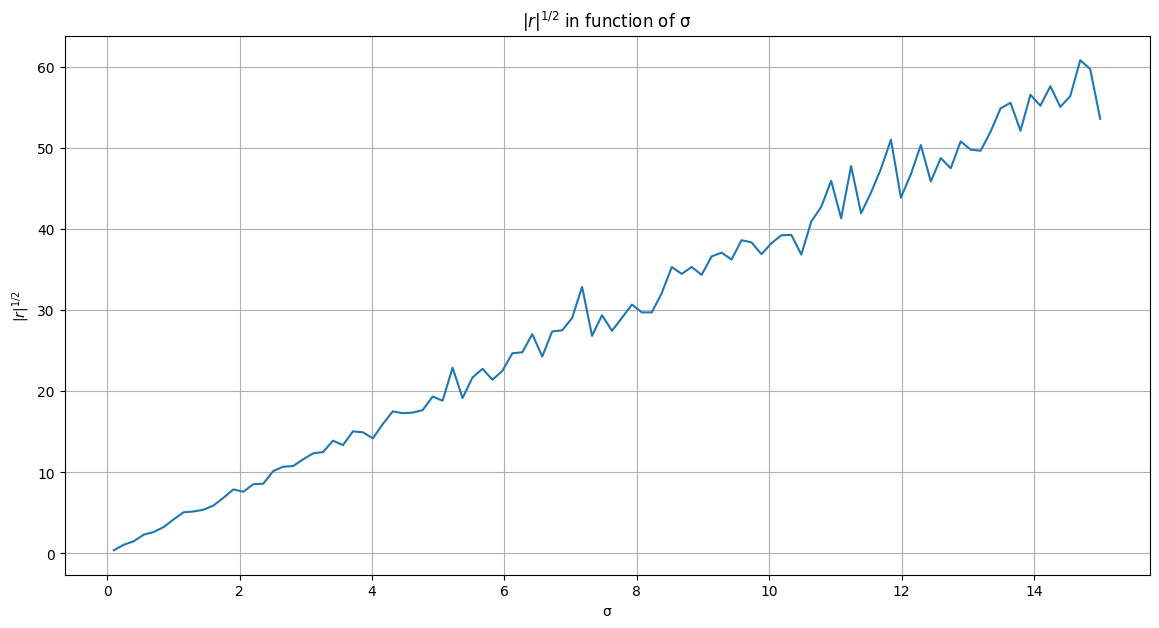

In [8]:
#takes about 20 seconds to complete 

nb_sigma=100
average=0
sigma =np.linspace(0.1,15,nb_sigma)
R_Emp_average=[]

for j in sigma :
    R_Emp_average_iteration=[]
    for _ in range(50):
        E = np.random.normal(average,j,NIT)
        R = np.zeros(NIT)
        R[0]=E[0]
        R[1]=E[1]
        for i in range(1,NIT-1):
            R[i+1]=(-E[i]*R[i]/R[i-1]+E[i+1])
        R_Emp_average_iteration.append(np.mean(np.abs(R)**1/2))
    R_Emp_average.append(np.median(R_Emp_average_iteration))
    
plt.figure(figsize=(14, 7))
plt.plot(sigma, R_Emp_average)
plt.xlabel(chr(963))
plt.ylabel("$|r|^{1/2}$")
plt.title("$|r|^{1/2}$ in function of " + chr(963))
plt.grid(True)
plt.show()

In [9]:
line = np.polyfit(sigma, R_Emp_average, 1, rcond=None, full=False, w=None, cov=False)

print("The slope is : ", line[0])
print("The ordinate at the origin is : ", line[1])

The slope is :  3.908417498397071
The ordinate at the origin is :  -0.038465138555245325


We have the following relationship : $\mathbb{E}\left[|r|^{1/2}\right]=a*\sigma+b$. We can't conclude directly, but it seems that $a=4$ and $b=0$

# Question 2

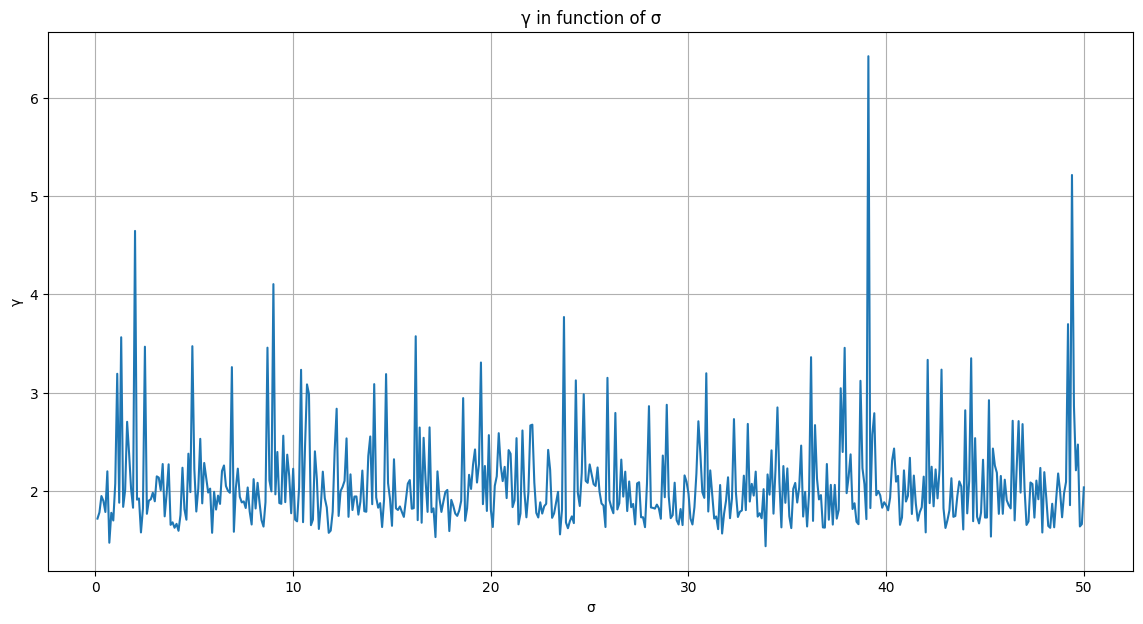

In [10]:
NIT=50
nb_sigma=500
average=0
sigma =np.linspace(0.1,50,nb_sigma)

exponent=[]

for j in sigma :
    E = np.random.normal(average,j,NIT)
    R = np.zeros(NIT)
    R[0]=E[0]
    R[1]=E[1]
    for i in range(1,NIT-1):
        R[i+1]=(-E[i]*R[i]/R[i-1]+E[i+1])
    ABS_return=np.abs(R)
    exponent.append(pl.Fit(ABS_return, verbose=False).alpha)
    
plt.figure(figsize=(14, 7))
plt.plot(sigma, exponent)
plt.xlabel(chr(963))
plt.ylabel(chr(947))
plt.title(chr(947) + " in function of " + chr(963))
plt.grid(True)
plt.show()


Values fluctuate around 2. We do the same as before to smooth the curve.

## Question 2 bis 

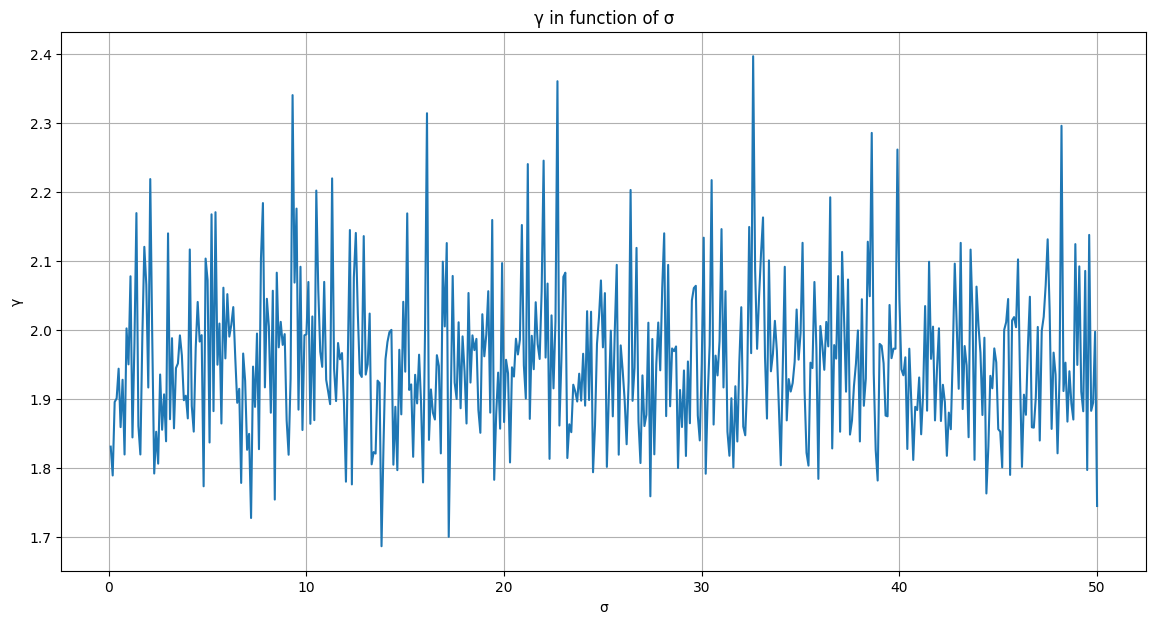

In [11]:
NIT=50
nb_sigma=500
average=0
sigma =np.linspace(0.1,50,nb_sigma)
iteration_exponent=[]
exponent=[]

for j in sigma :
    iteration_exponent=[]
    for _ in range(10):
        E = np.random.normal(average,j,NIT)
        R = np.zeros(NIT)
        R[0]=E[0]
        R[1]=E[1]
        for i in range(1,NIT-1):
            R[i+1]=(-E[i]*R[i]/R[i-1]+E[i+1])
        ABS_return=np.abs(R)
        iteration_exponent.append(pl.Fit(ABS_return, verbose=False).alpha)
    exponent.append(np.median(iteration_exponent))
    
plt.figure(figsize=(14, 7))
plt.plot(sigma, exponent)
plt.xlabel(chr(963))
plt.ylabel(chr(947))
plt.title(chr(947) + " in function of " + chr(963))
plt.grid(True)
plt.show()

it seems that $\gamma$ does not depend on $\sigma$ and that $\gamma$ is constant at 2

#  Optimal learning and market dynamics

## Question 1

/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64062/1409090998.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_C = yf.download(ticker, start_date, progress=False)


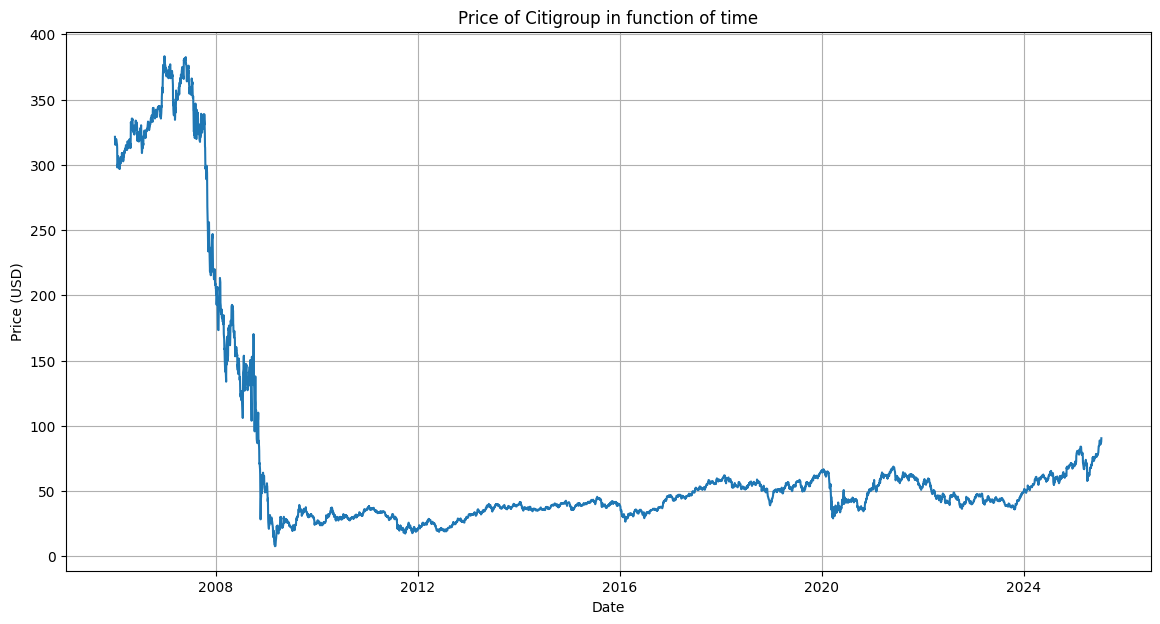

In [12]:
ticker = "C" # Citigroup
start_date = "2006-01-01"  # Start date

#Citigroup stock prices
data_C = yf.download(ticker, start_date, progress=False)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data_C.index, data_C['Close'])
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Price of Citigroup in function of time')
plt.grid(True)
plt.show()

## Question 2

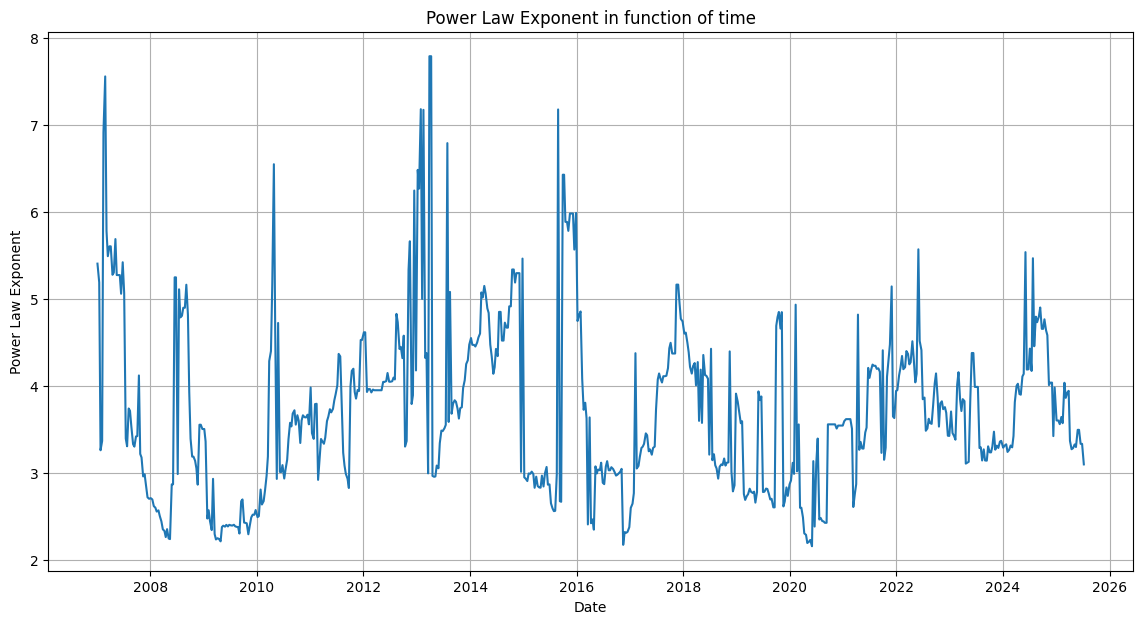

In [13]:
# Calculate the log returns of the 'Close' prices

data_C['LogReturn'] = np.log(data_C['Close'] / data_C['Close'].shift(1)) #add a LogReturn column to the data frame
data_C = data_C.dropna() #remove NaN values

window = 252  # window size
week = 7  # week

exponent = []
dates = []

for start in range(0, len(data_C) - window + 1, week): #for all the starting days of the windows
    end = start + window #compute the last day of the window
    ABS_return = data_C.iloc[start:end]['LogReturn'].abs() #gets the logreturn slice we're interested in
    dates.append(data_C.index[end-1]) #gets the last date of slice we're interested in
    exponent.append(pl.Fit(ABS_return, verbose=False).alpha)
    
plt.figure(figsize=(14, 7))
plt.plot(dates, exponent)
plt.title('Power Law Exponent in function of time')
plt.xlabel('Date')
plt.ylabel('Power Law Exponent')
plt.grid(True)
plt.show()



contrary to what we saw in part 3, the value of $\gamma$ doesn't seem to be close to 2. However, in the model studied previously, $\gamma$ remained close to 2 whatever the value of the standard deviation chosen. We can therefore affirm that the value of a citigroup share does not follow the same law as that studied at the beginning. 

## Question 3

peaks are sympathetic to weeks when the tail exponent is large, which translates into a week when large-scale events are unlikely to occur. In the case of Citigroup, we note that sigma variations are very large and very rapid, showing that investors alternate between periods of crisis (large variations corresponding to low $\gamma$) and periods of “bear market” (small variations and therefore high $\gamma$).

The periods during which the same strategy is maintained, corresponding to a more or less constant $\gamma$, are very short.  

## Question 4

/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_64062/2661591956.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_BTC = yf.download(ticker, start_date, progress=False)


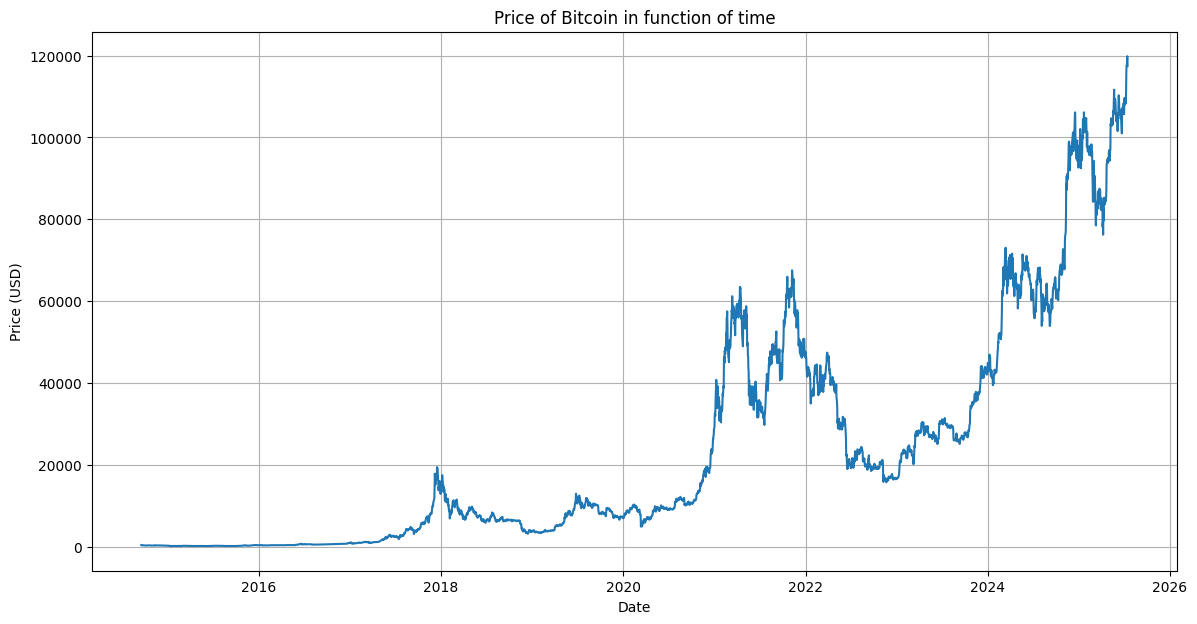

In [14]:
ticker = "BTC-USD" # Citigroup
start_date = "2010-01-01"  # Start date

#Citigroup stock prices
data_BTC = yf.download(ticker, start_date, progress=False)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data_BTC.index, data_BTC['Close'])
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Price of Bitcoin in function of time')
plt.grid(True)
plt.show()

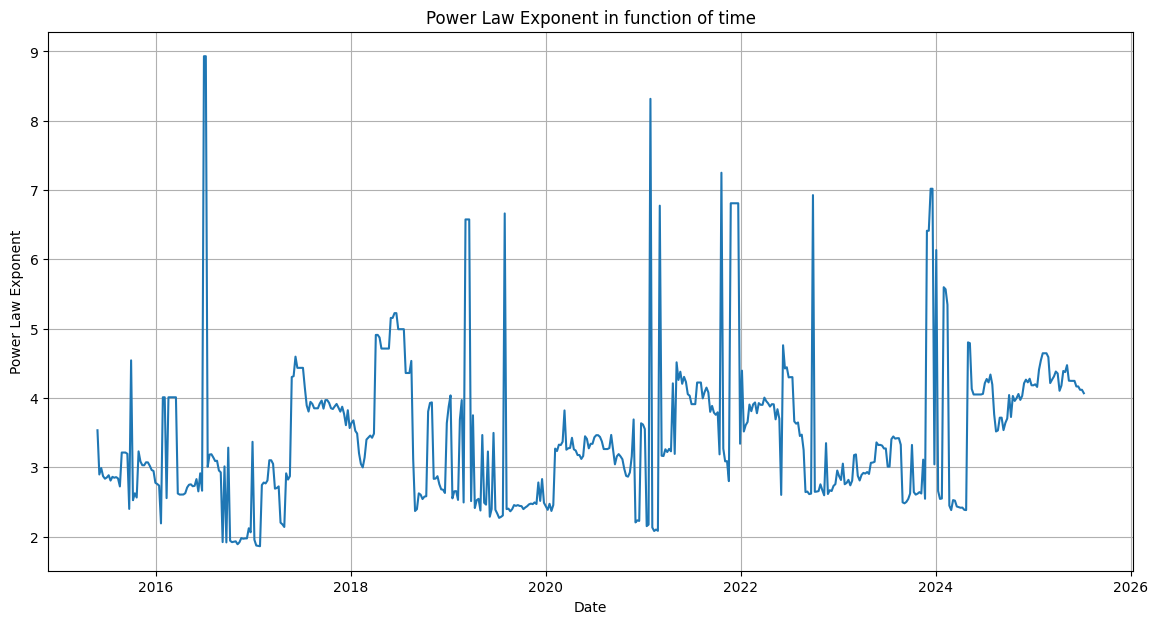

In [15]:
# Calculate the log returns of the 'Close' prices

data_BTC['LogReturn'] = np.log(data_BTC['Close'] / data_BTC['Close'].shift(1)) #add a LogReturn column to the data frame
data_BTC = data_BTC.dropna() #remove NaN values

window = 252  # window size
week = 7  # week

exponent = []
dates = []

for start in range(0, len(data_BTC) - window + 1, week): #for all the starting days of the windows
    end = start + window #compute the last day of the window
    ABS_return = data_BTC.iloc[start:end]['LogReturn'].abs() #gets the logreturn slice we're interested in
    dates.append(data_BTC.index[end-1]) #gets the last date of slice we're interested in
    exponent.append(pl.Fit(ABS_return, verbose=False).alpha)
   
plt.figure(figsize=(14, 7)) 
plt.plot(dates, exponent)
plt.title('Power Law Exponent in function of time')
plt.xlabel('Date')
plt.ylabel('Power Law Exponent')
plt.grid(True)
plt.show()

First of all, we notice that the variation in $\gamma$ are much greater in the case of citigroup than in the case of bitcoin. This means that in the case of bitcoin, investors tend to maintain the same behavior for much longer. 
However, when we analyze the $\gamma$ values for bitcoin, we notice that they seem to have a lower average than for citigroup, which corresponds to the fact that for bitcoin, large-scale movements are more likely to occur. In fact, when we look at the bitcoin price, it seems to fluctuate much more strongly than for Citigroup.
